In [1]:
!pip install mlxtend --user
!pip install lightgbm --user
!pip install xgboost --user
!pip install plotly --user

     |████████████████████████████████| 1.3 MB 22.8 MB/s            
     |████████████████████████████████| 9.8 MB 65.5 MB/s            
     |████████████████████████████████| 297 kB 56.1 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 2.0 MB 24.1 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 200.3 MB 32 kB/s              
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 15.3 MB 20.4 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [2]:
import os
import pandas as pd
import scipy as sp
import numpy as np
import math
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [3]:
def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

def mae(y, y_pred):
    return np.mean(np.absolute(np.subtract(y, y_pred)))

def r2(y, y_pred):
    return 1 - np.sum((y - y_pred)**2)/np.sum((y - np.mean(y))**2)

def mape(y, y_pred):
    return (np.mean(np.divide(np.absolute(np.subtract(y,y_pred)), y))*100)

def errors(y, y_pred):
    return np.absolute(y - y_pred)

,Crop_Protection_Application_Doses,Soil_Organic_Matter,Yield_kg_per_Ha,N_as_Urea_kg_per_Ha,N_as_Nitrate_kg_per_Ha,N_as_Ammonium_kg_per_Ha,P_as_Phosphorus_kg_per_Ha,P_as_P2O5_kg_per_Ha,K_as_Potassium_kg_per_Ha,K_as_K2O_kg_per_Ha
0,18.0,2.681429,11941.555556,0.00,74.25,74.25,0.0,0.0,0.0,0.0
1,17.0,2.681429,10673.777778,0.00,74.25,74.25,0.0,0.0,0.0,0.0
2,25.0,2.316250,6964.509804,187.68,0.00,24.20,0.0,114.4,0.0,120.0
3,15.0,3.050000,6791.805556,0.00,23.00,0.00,75.9,0.0,0.0,0.0
4,15.0,2.620000,10860.333333,0.00,26.00,0.00,85.8,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
281,15.0,3.100000,6407.142857,92.00,36.00,0.00,63.0,0.0,150.0,0.0
282,15.0,2.100000,7456.000000,92.00,36.00,0.00,126.0,0.0,150.0,0.0
283,15.0,2.500000,7693.066667,165.60,36.00,0.00,63.0,0.0,54.0,96.0
284,16.0,2.690000,8992.923077,128.80,0.00,24.20,0.0,114.4,0.0,78.0


None


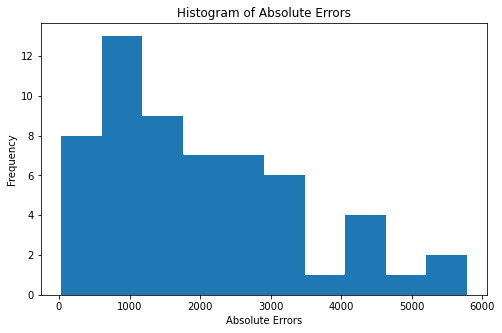

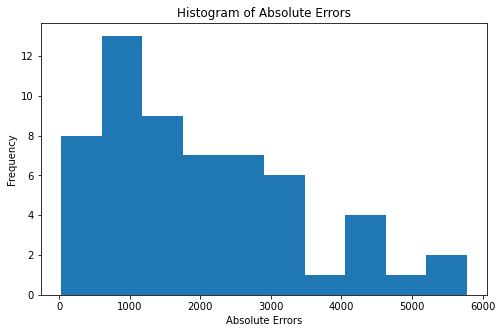

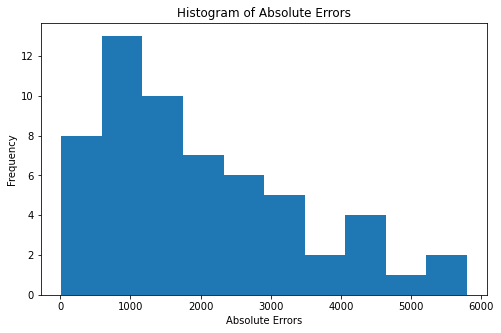

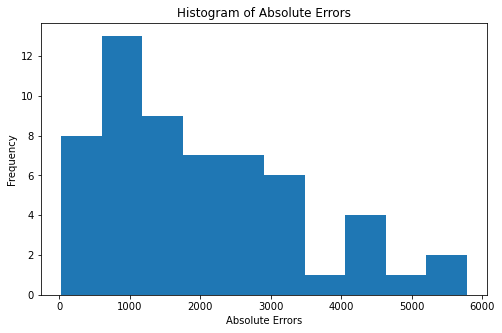

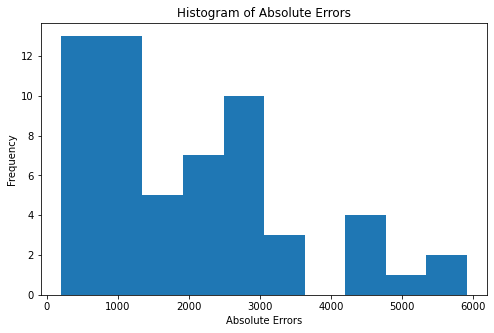

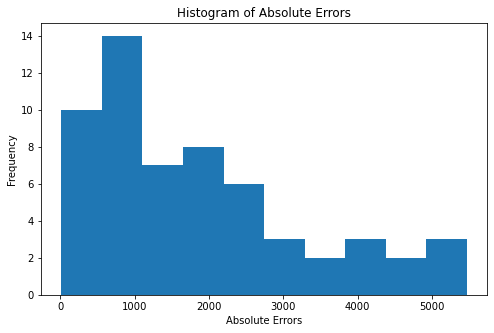

[19:38:46] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


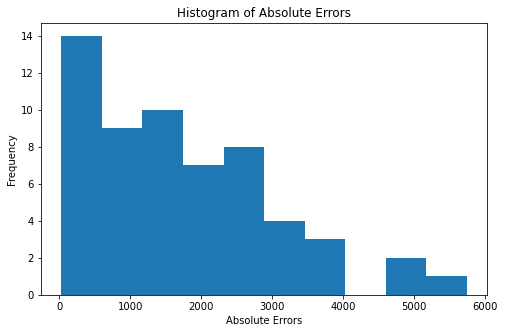

OLS
MAE on test data: 2006.3650494333542
RMSE on test data: 2443.339021882162
R squared on test data: 0.0042973399344948815
MAPE on test data: 44.965114310883976


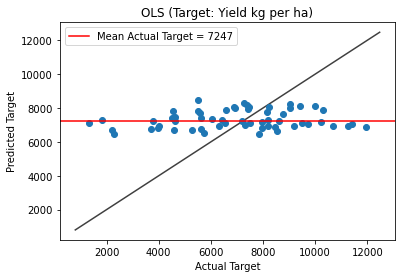

Lasso
MAE on test data: 2004.2332118400443
RMSE on test data: 2442.3880182870307
R squared on test data: 0.005072289722513057
MAPE on test data: 44.95001313069231


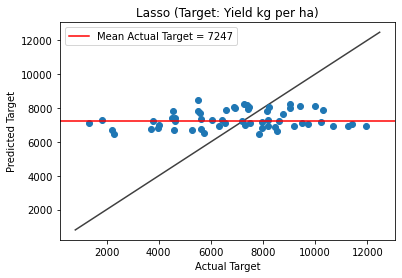

Ridge
MAE on test data: 1995.1107870088322
RMSE on test data: 2438.292264526543
R squared on test data: 0.008406372693538833
MAPE on test data: 44.92095911148431


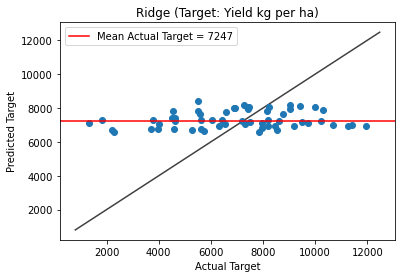

ElasticNet
MAE on test data: 2004.4995582281433
RMSE on test data: 2442.5039793626734
R squared on test data: 0.004977812001957904
MAPE on test data: 44.95189554074277


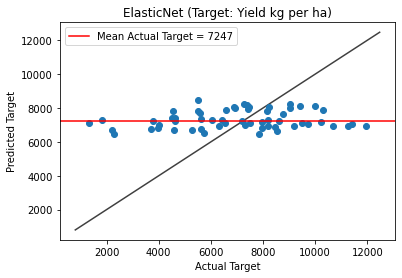

SVR
MAE on test data: 1983.7023964652278
RMSE on test data: 2441.1437085829243
R squared on test data: 0.00608579194862946
MAPE on test data: 45.11732899838952


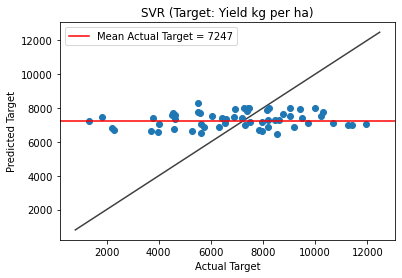

GBR
MAE on test data: 1867.5961968706226
RMSE on test data: 2361.384429401903
R squared on test data: 0.06997291679998952
MAPE on test data: 37.72721038365864


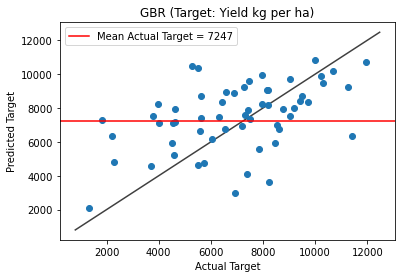

XGBoost
MAE on test data: 1736.4574054299837
RMSE on test data: 2188.0526714044827
R squared on test data: 0.20149479799729464
MAPE on test data: 35.636180072511046


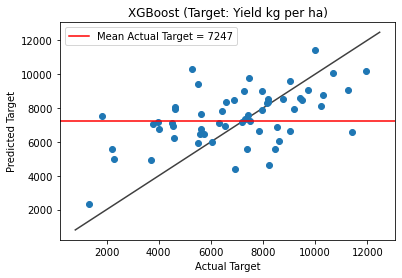

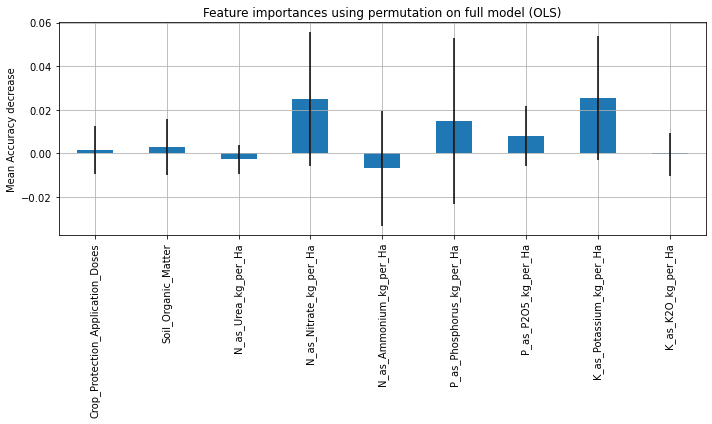

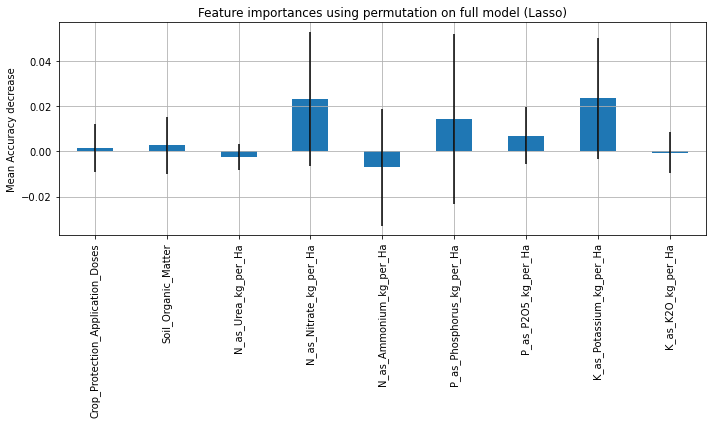

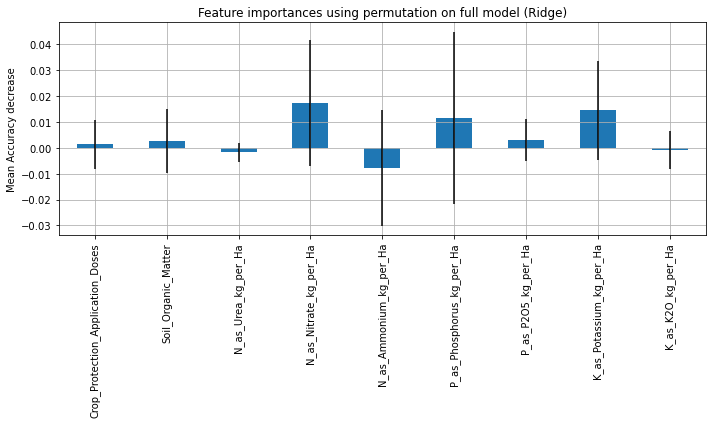

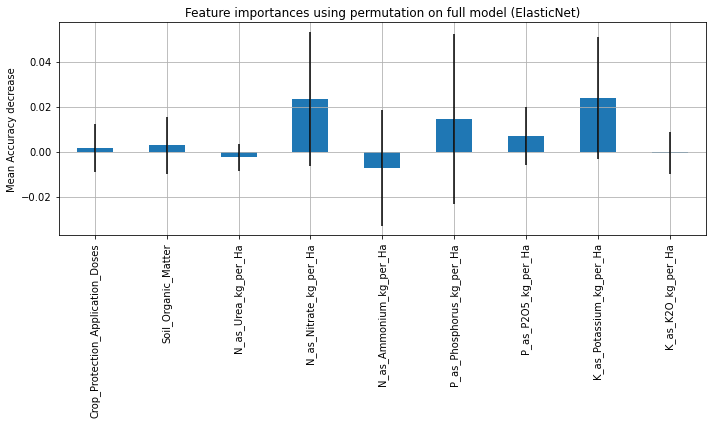

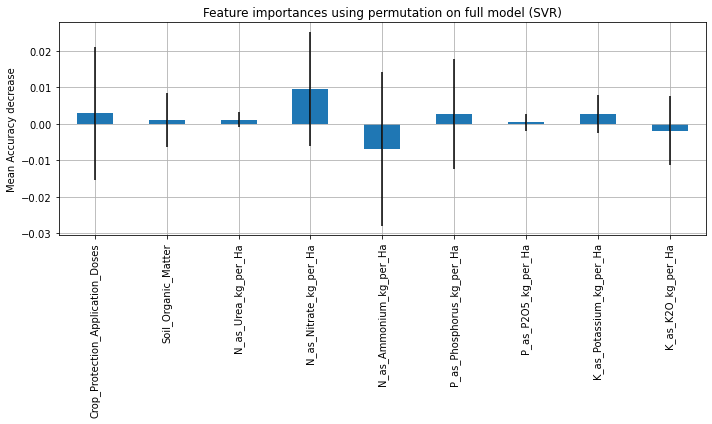

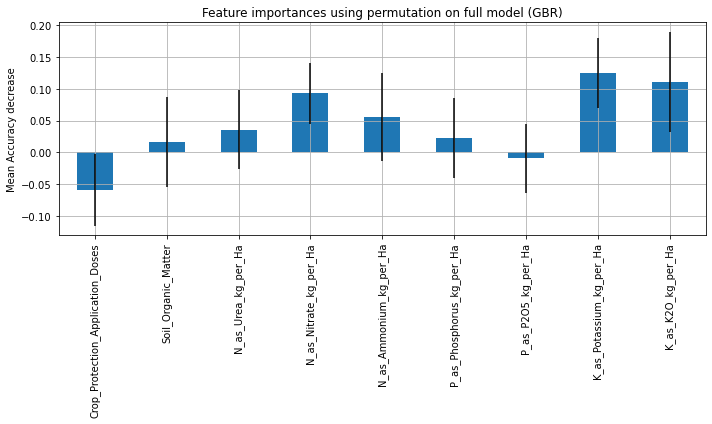

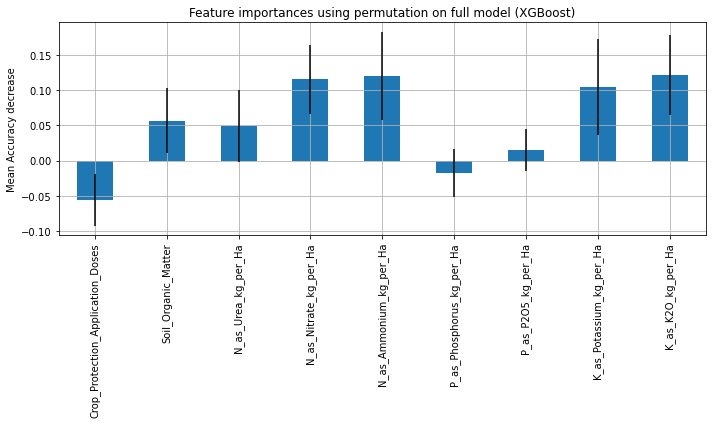

In [4]:
#Summer
#Soil_Organic_Matter Cluster 0

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_0 = df[df['cluster'] == 0].reset_index(drop = True)
df_SOM_cluster_0 = df_SOM_cluster_0.drop(columns = ['cluster'])
print(display(df_SOM_cluster_0))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_0, test_size = 0.2, random_state = 60)

# num_samples = 5000

# for i in range(num_samples):
bootstrap_sample = train_Yield_kg_per_ha.sample(replace=True)
train_Yield_kg_per_ha = pd.concat([train_Yield_kg_per_ha, bootstrap_sample])
    
X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()